In [2]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import re

# Accessing API data

link to landslide data: https://data.nasa.gov/Earth-Science/Global-Landslide-Catalog-Export/dd9e-wu2v

request a nasa api key here: https://api.nasa.gov/index.html#signUp

In [3]:
# save your personal api key in a text file and read it in, I saved mine as nasa_key
with open('nasa_apikey.txt', 'r') as file:
    nasa_key = file.read()

In [4]:
# initialize the payload
payload = {}

# save the apikey as a header to use in request.get()
headers= {
  "apikey": nasa_key
}

In [5]:
# url for accessing the data - this is usually found in the API documentation
nasa_url = 'https://data.nasa.gov/resource/dd9e-wu2v.json'

In [6]:
# request to pull the data with your API
r = requests.get(nasa_url, headers=headers, data = payload)

In [7]:
# this will return True if your request is successful
r.ok

True

In [8]:
# read the data and turn it into a data frame
landslide = r.json()
landslide_df = pd.DataFrame(landslide)

In [9]:
landslide_df.shape

(1000, 30)

### Data cleaning

In [10]:
# select desired columns
landslide_df = landslide_df[['event_date', 'landslide_category', 'landslide_trigger', 
'landslide_size', 'fatality_count', 'injury_count', 'country_name', 'longitude', 'latitude']]

In [11]:
landslide_df.isnull().sum()

event_date              0
landslide_category      0
landslide_trigger       1
landslide_size          3
fatality_count        110
injury_count          672
country_name          148
longitude               0
latitude                0
dtype: int64

In [12]:
landslide_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   event_date          1000 non-null   object
 1   landslide_category  1000 non-null   object
 2   landslide_trigger   999 non-null    object
 3   landslide_size      997 non-null    object
 4   fatality_count      890 non-null    object
 5   injury_count        328 non-null    object
 6   country_name        852 non-null    object
 7   longitude           1000 non-null   object
 8   latitude            1000 non-null   object
dtypes: object(9)
memory usage: 70.4+ KB


In [13]:
# changing numeric variables to type float instead of type object
landslide_df['fatality_count'] = landslide_df['fatality_count'].astype(float)
landslide_df['injury_count'] = landslide_df['injury_count'].astype(float)
landslide_df['longitude'] = landslide_df['longitude'].astype(float)
landslide_df['latitude'] = landslide_df['latitude'].astype(float)

# simplifying event_date and changing to type datetime
landslide_df['event_date'] = landslide_df['event_date'].str.extract(r'(\d+\-\d+\-\d+)')
landslide_df['event_date'] = pd.to_datetime(landslide_df['event_date'])

In [14]:
# fill NA variables
landslide_df['landslide_size'] = landslide_df['landslide_size'].fillna('unknown')
landslide_df['landslide_trigger'] = landslide_df['landslide_trigger'].fillna('unknown')
landslide_df['country_name'] = landslide_df['country_name'].fillna('other/unknown')
landslide_df['fatality_count'] = landslide_df['fatality_count'].fillna(0)
landslide_df['injury_count'] = landslide_df['injury_count'].fillna(0)

In [15]:
landslide_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   event_date          1000 non-null   datetime64[ns]
 1   landslide_category  1000 non-null   object        
 2   landslide_trigger   1000 non-null   object        
 3   landslide_size      1000 non-null   object        
 4   fatality_count      1000 non-null   float64       
 5   injury_count        1000 non-null   float64       
 6   country_name        1000 non-null   object        
 7   longitude           1000 non-null   float64       
 8   latitude            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 70.4+ KB


In [16]:
landslide_df.head()

,event_date,landslide_category,landslide_trigger,landslide_size,fatality_count,injury_count,country_name,longitude,latitude
0,2014-05-20,landslide,downpour,small,0.0,0.0,New Zealand,167.6337,-46.7748
1,2010-05-29,landslide,downpour,medium,0.0,0.0,New Zealand,170.0982,-45.9034
2,2015-06-04,landslide,downpour,medium,0.0,0.0,New Zealand,170.6273,-45.8767
3,2013-06-17,landslide,downpour,medium,0.0,0.0,New Zealand,170.5863,-45.8727
4,2014-05-01,landslide,rain,small,0.0,0.0,New Zealand,170.5090,-45.8618


In [17]:
landslide_df.shape

(1000, 9)

### Exporting the data

In [18]:
landslide_df.to_csv("landslide", index = False)

In [19]:
from pandas import read_csv

csv = read_csv('landslide')

In [20]:
# Note: you will have to change the variable types again if you read it in from a csv
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   event_date          1000 non-null   object 
 1   landslide_category  1000 non-null   object 
 2   landslide_trigger   1000 non-null   object 
 3   landslide_size      1000 non-null   object 
 4   fatality_count      1000 non-null   float64
 5   injury_count        1000 non-null   float64
 6   country_name        1000 non-null   object 
 7   longitude           1000 non-null   float64
 8   latitude            1000 non-null   float64
dtypes: float64(4), object(5)
memory usage: 70.4+ KB


----------------------------------
# Exploratory Data Analysis

In [21]:
landslide_df.sort_values(by = 'event_date')

,event_date,landslide_category,landslide_trigger,landslide_size,fatality_count,injury_count,country_name,longitude,latitude
858,2006-01-04,mudslide,downpour,medium,240.0,0.0,Indonesia,110.196900,-6.934300
657,2007-01-03,complex,rain,medium,0.0,0.0,Peru,-75.426700,-10.383800
470,2007-01-05,landslide,rain,large,7.0,0.0,Brazil,-42.536362,-22.282346
483,2007-01-05,landslide,rain,medium,2.0,0.0,Brazil,-42.673400,-22.045200
310,2007-01-05,landslide,rain,medium,1.0,0.0,Brazil,-46.613600,-23.231100
...,...,...,...,...,...,...,...,...,...
162,2017-07-01,landslide,downpour,small,0.0,0.0,other/unknown,175.234401,-36.956655
925,2017-07-01,landslide,continuous_rain,medium,0.0,0.0,other/unknown,106.786290,-6.558993
17,2017-07-03,landslide,rain,medium,0.0,0.0,other/unknown,167.940244,-44.675943
132,2017-07-07,landslide,rain,large,0.0,0.0,other/unknown,177.293826,-38.188698


In [22]:
landslide_df.head()

,event_date,landslide_category,landslide_trigger,landslide_size,fatality_count,injury_count,country_name,longitude,latitude
0,2014-05-20,landslide,downpour,small,0.0,0.0,New Zealand,167.6337,-46.7748
1,2010-05-29,landslide,downpour,medium,0.0,0.0,New Zealand,170.0982,-45.9034
2,2015-06-04,landslide,downpour,medium,0.0,0.0,New Zealand,170.6273,-45.8767
3,2013-06-17,landslide,downpour,medium,0.0,0.0,New Zealand,170.5863,-45.8727
4,2014-05-01,landslide,rain,small,0.0,0.0,New Zealand,170.5090,-45.8618


Ideas for analysis:
- geographic map with latitude and longitude
- see if fatilities or injuries are more common in certain countries
- different triggers with landslide size or severity (fatality/injury count)
- common times of year for landslide (different in different hemispheres - seasons are different times of year)
- commmon landslide categories in certain areas, which are more severe

In [23]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
#plt.figure(figsize = (20, 8))
px.scatter_geo(landslide_df, lat = 'latitude', lon = 'longitude', hover_name = 'country_name')

In [25]:
fig = px.scatter_mapbox(landslide_df, lat = 'latitude', lon = 'longitude')
fig.update_layout(mapbox_style = "open-street-map")
fig.update_layout(margin = {'r':200, 't':0, 'l':200, 'b':0})
fig.show()
fig.write_html('landslide_map.html', full_html = False, include_plotlyjs = 'cdn')

In [26]:
landslide_df.head()

,event_date,landslide_category,landslide_trigger,landslide_size,fatality_count,injury_count,country_name,longitude,latitude
0,2014-05-20,landslide,downpour,small,0.0,0.0,New Zealand,167.6337,-46.7748
1,2010-05-29,landslide,downpour,medium,0.0,0.0,New Zealand,170.0982,-45.9034
2,2015-06-04,landslide,downpour,medium,0.0,0.0,New Zealand,170.6273,-45.8767
3,2013-06-17,landslide,downpour,medium,0.0,0.0,New Zealand,170.5863,-45.8727
4,2014-05-01,landslide,rain,small,0.0,0.0,New Zealand,170.5090,-45.8618


<AxesSubplot:xlabel='fatality_count', ylabel='injury_count'>

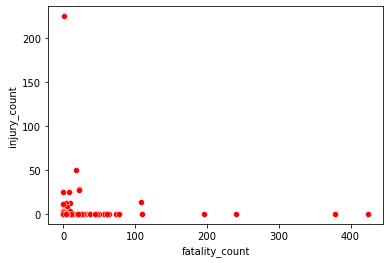

In [27]:
sns.scatterplot(data = landslide_df, x = 'fatality_count', y = 'injury_count', color = 'red')

<AxesSubplot:xlabel='landslide_size', ylabel='fatality_count'>

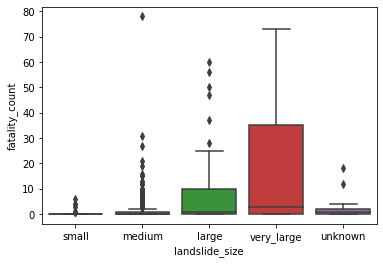

In [28]:
sns.boxplot(data = landslide_df[landslide_df['fatality_count'] < 100], x = 'landslide_size', y = 'fatality_count')

In [29]:
# try density plot

<AxesSubplot:xlabel='landslide_size', ylabel='fatality_count'>

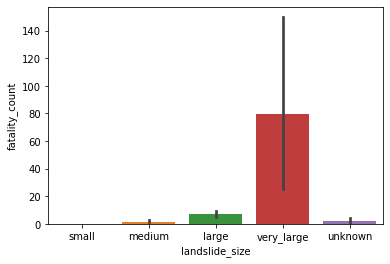

In [30]:
sns.barplot(data = landslide_df, x = 'landslide_size', y = 'fatality_count')

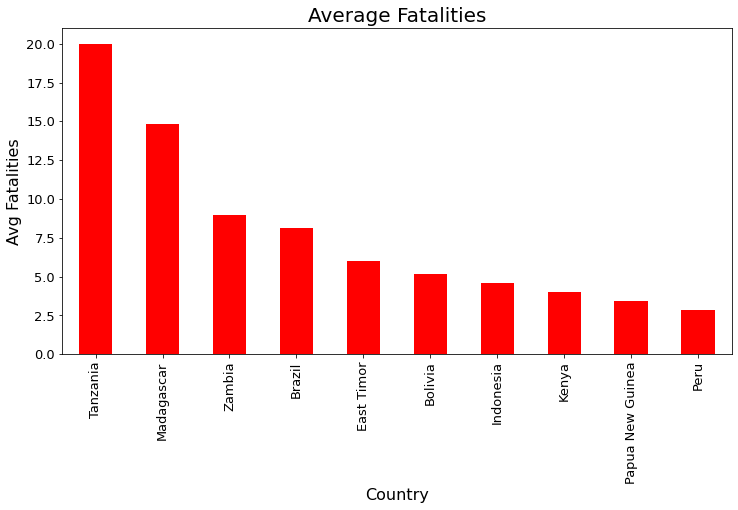

In [31]:
# using pandas
plt.figure(figsize = (12, 6))
landslide_df.groupby('country_name')['fatality_count'].mean().sort_values(ascending = False).head(10).plot(kind = 'bar', color = 'red', fontsize = 13)
plt.title('Average Fatalities', fontsize = 20)
plt.xlabel('Country', fontsize = 16)
plt.ylabel('Avg Fatalities', fontsize = 16)
plt.show()

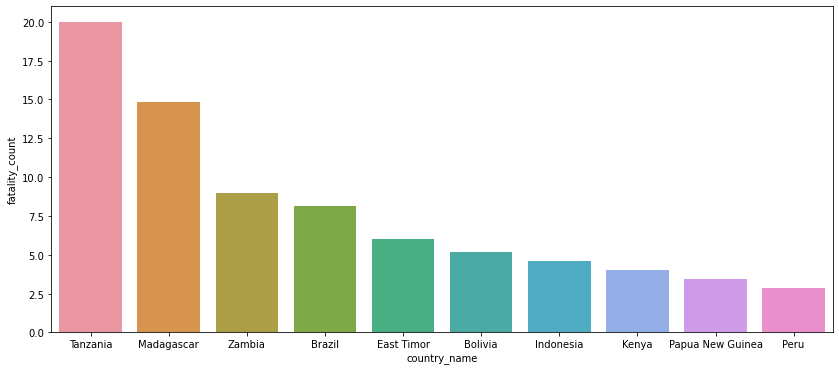

In [32]:
temp = landslide_df.groupby('country_name')[['fatality_count', 'injury_count']].mean().sort_values(by = ['fatality_count', 'injury_count'], ascending = False).head(10).reset_index()

plt.figure(figsize = (14, 6))
sns.set_palette("Blues")
sns.barplot(data = temp, x = 'country_name', y= 'fatality_count')
plt.show()

<AxesSubplot:xlabel='country_name', ylabel='injury_count'>

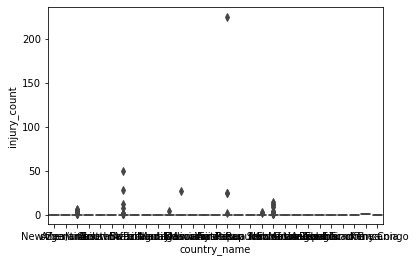

In [33]:
sns.boxplot(data = landslide_df, x = 'country_name', y = 'injury_count')

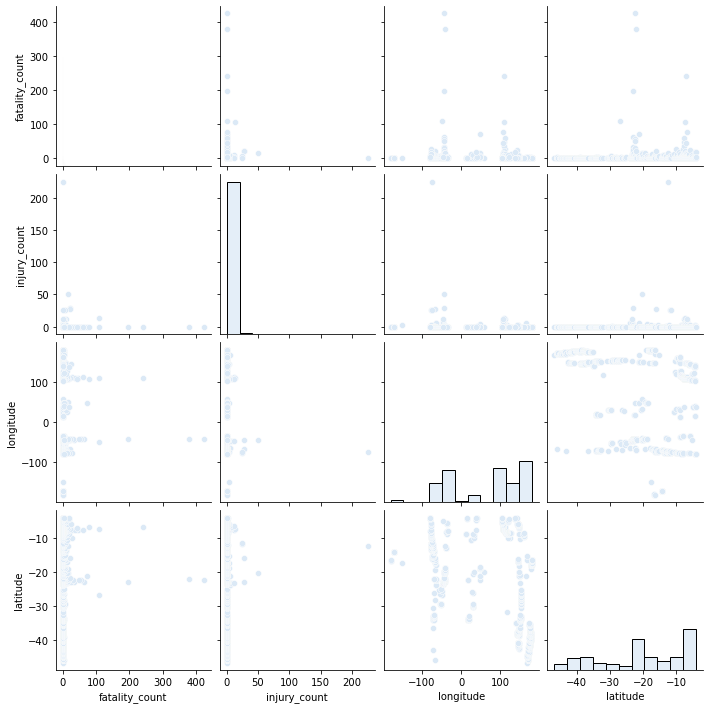

In [34]:
sns.pairplot(landslide_df)

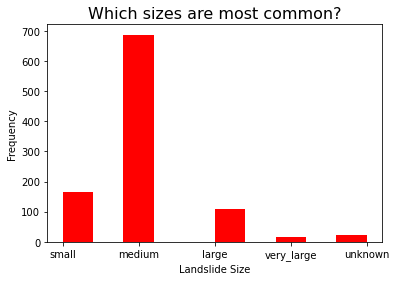

In [35]:
plt.hist(data = landslide_df, x = 'landslide_size', color = 'red')
plt.xlabel('Landslide Size')
plt.ylabel('Frequency')
plt.title('Which sizes are most common?', fontsize = 16)
plt.show()

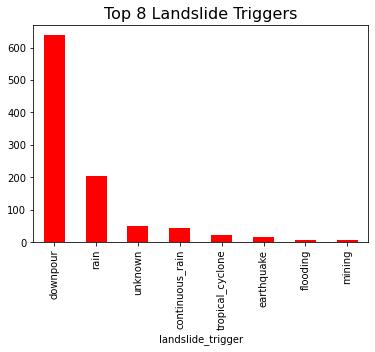

In [36]:
landslide_df.groupby('landslide_trigger')['landslide_trigger'].count().sort_values(ascending = False).head(8).plot(kind = 'bar', color = 'red')
plt.title('Top 8 Landslide Triggers', fontsize = 16)
plt.show()

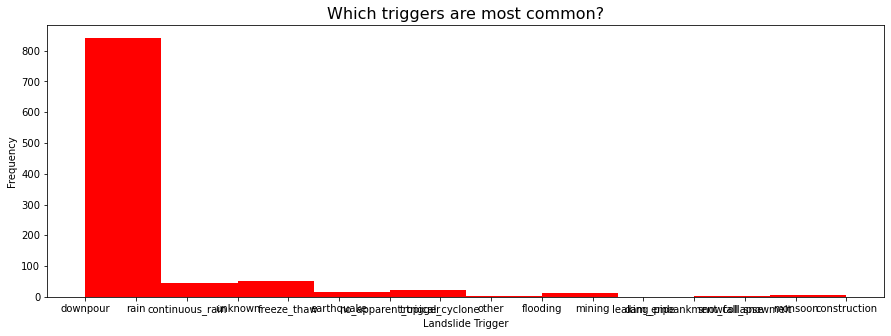

In [37]:
plt.figure(figsize = (15, 5))
plt.hist(data = landslide_df, x = 'landslide_trigger', color = 'red')
plt.xlabel('Landslide Trigger')
plt.ylabel('Frequency')
plt.title('Which triggers are most common?', fontsize = 16)
plt.show()

In [38]:
landslide_df.head()

,event_date,landslide_category,landslide_trigger,landslide_size,fatality_count,injury_count,country_name,longitude,latitude
0,2014-05-20,landslide,downpour,small,0.0,0.0,New Zealand,167.6337,-46.7748
1,2010-05-29,landslide,downpour,medium,0.0,0.0,New Zealand,170.0982,-45.9034
2,2015-06-04,landslide,downpour,medium,0.0,0.0,New Zealand,170.6273,-45.8767
3,2013-06-17,landslide,downpour,medium,0.0,0.0,New Zealand,170.5863,-45.8727
4,2014-05-01,landslide,rain,small,0.0,0.0,New Zealand,170.5090,-45.8618


In [42]:
landslide_df = landslide_df.set_index('event_date')

In [43]:
landslide_df.head()

,landslide_category,landslide_trigger,landslide_size,fatality_count,injury_count,country_name,longitude,latitude
event_date,,,,,,,,
2014-05-20,landslide,downpour,small,0.0,0.0,New Zealand,167.6337,-46.7748
2010-05-29,landslide,downpour,medium,0.0,0.0,New Zealand,170.0982,-45.9034
2015-06-04,landslide,downpour,medium,0.0,0.0,New Zealand,170.6273,-45.8767
2013-06-17,landslide,downpour,medium,0.0,0.0,New Zealand,170.5863,-45.8727
2014-05-01,landslide,rain,small,0.0,0.0,New Zealand,170.5090,-45.8618


<AxesSubplot:xlabel='event_date'>

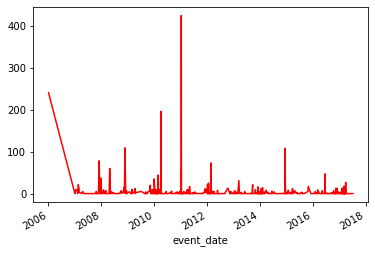

In [48]:
landslide_df['fatality_count'].plot(color = 'red')

<AxesSubplot:xlabel='event_date'>

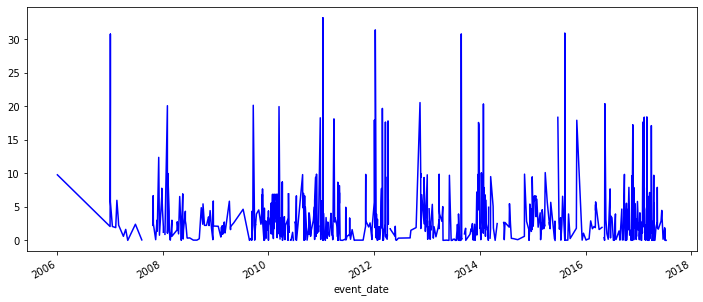

In [53]:
#aqi['Utah'].rolling(30).mean().plot()
plt.figure(figsize = (12, 5))
landslide_df['fatality_count'].rolling(30).mean().plot(color = 'blue')

In [58]:
landslide_df.index

DatetimeIndex(['2014-05-20', '2010-05-29', '2015-06-04', '2013-06-17',
               '2014-05-01', '2010-02-17', '2010-05-29', '2013-06-17',
               '2013-06-19', '2013-06-20',
               ...
               '2010-07-05', '2007-10-29', '2012-12-11', '2015-07-21',
               '2011-08-02', '2015-05-01', '2015-03-18', '2009-11-10',
               '2007-06-27', '2014-04-30'],
              dtype='datetime64[ns]', name='event_date', length=1000, freq=None)

In [68]:
landslide_df['month'] = landslide_df.index.month#.plot() #str.extract(r'\d+\-(\d+)\-\d+')

<AxesSubplot:xlabel='month'>

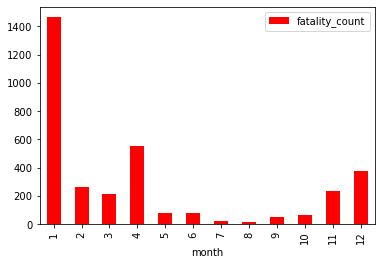

In [76]:
landslide_df.groupby('month').sum().reset_index().plot(kind = 'bar', x = 'month', y = 'fatality_count', color = 'red')

In [87]:
landslide_df['month'].groupby('month').count().reset_index()#.plot(kind = 'bar', x = 'month', y = 'fatality_count', color = 'red')
plt.show()

KeyError: 'month'